In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

#RF
from sklearn.ensemble import RandomForestRegressor

#MLP
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor, MLPClassifier

#TF
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

%matplotlib inline

**Load Datasets:**

In [89]:
df = pd.read_csv("Appendix_2_Data_for_Figure_2.1.csv")

In [90]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        147 non-null    int64  
 1   Country                                     147 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

In [92]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RANK,147.0,74.000000,42.579338,1.000,37.50000,74.0000,110.50000,147.000
Happiness score,146.0,5.553575,1.086843,2.404,4.88875,5.5685,6.30500,7.821
Whisker-high,146.0,5.673589,1.065621,2.469,5.00625,5.6800,6.44875,7.886
Whisker-low,146.0,5.433568,1.109380,2.339,4.75475,5.4530,6.19000,7.756
Dystopia (1.83) + residual,146.0,1.831808,0.534994,0.187,1.55525,1.8945,2.15300,2.844
Explained by: GDP per capita,146.0,1.410445,0.421663,0.000,1.09550,1.4455,1.78475,2.209
Explained by: Social support,146.0,0.905863,0.280122,0.000,0.73200,0.9575,1.11425,1.320
Explained by: Healthy life expectancy,146.0,0.586171,0.176336,0.000,0.46325,0.6215,0.71975,0.942
Explained by: Freedom to make life choices,146.0,0.517226,0.145859,0.000,0.44050,0.5435,0.62600,0.740
Explained by: Generosity,146.0,0.147377,0.082799,0.000,0.08900,0.1325,0.19775,0.468


In [93]:
df_years = pd.read_csv("DataForTable2.1.csv")

In [94]:
df_years.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


In [95]:
df_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       2089 non-null   object 
 1   year                               2089 non-null   int64  
 2   Life Ladder                        2089 non-null   float64
 3   Log GDP per capita                 2062 non-null   float64
 4   Social support                     2076 non-null   float64
 5   Healthy life expectancy at birth   2031 non-null   float64
 6   Freedom to make life choices       2057 non-null   float64
 7   Generosity                         2009 non-null   float64
 8   Perceptions of corruption          1976 non-null   float64
 9   Positive affect                    2065 non-null   float64
 10  Negative affect                    2073 non-null   float64
 11  Confidence in national government  1873 non-null   float

In [96]:
df_years.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,2089.0,2013.727621,4.455614,2005.000000,2010.000000,2014.000000,2017.000000,2021.000000
Life Ladder,2089.0,5.473747,1.115567,2.178809,4.651972,5.405246,6.294282,8.018934
Log GDP per capita,2062.0,9.378408,1.143520,5.526723,8.473547,9.463269,10.347656,11.665803
Social support,2076.0,0.811542,0.118935,0.290184,0.747664,0.834770,0.904682,0.987343
Healthy life expectancy at birth,2031.0,63.180326,6.948546,6.720000,58.965000,64.980003,68.362499,74.349998
Freedom to make life choices,2057.0,0.745462,0.140751,0.257534,0.651689,0.767357,0.857677,0.985178
Generosity,2009.0,0.000102,0.161082,-0.335739,-0.113172,-0.023366,0.090584,0.706377
Perceptions of corruption,1976.0,0.746474,0.186136,0.035198,0.689840,0.801339,0.870789,0.983276
Positive affect,2065.0,0.651421,0.105954,0.178886,0.570057,0.662837,0.737176,0.883586
Negative affect,2073.0,0.270544,0.085849,0.082737,0.207652,0.260328,0.321706,0.704590


In [97]:
df_years["Country name"].value_counts()

Zimbabwe        16
Tanzania        16
Indonesia       16
India           16
South Africa    16
                ..
Suriname         1
Guyana           1
Maldives         1
Cuba             1
Oman             1
Name: Country name, Length: 166, dtype: int64

In [98]:
df_years.groupby("Country name").get_group("Afghanistan")

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440
5,Afghanistan,2013,3.572100,7.657503,0.483552,52.000000,0.577955,0.066344,0.823204,0.547417,0.273328,0.482847
6,Afghanistan,2014,3.130896,7.650827,0.525568,52.299999,0.508514,0.109215,0.871242,0.491641,0.374861,0.409048
7,Afghanistan,2015,3.982855,7.634466,0.528597,52.599998,0.388928,0.085082,0.880638,0.491410,0.339276,0.260557
8,Afghanistan,2016,4.220169,7.629037,0.559072,52.924999,0.522566,0.047488,0.793246,0.501409,0.348332,0.324990
9,Afghanistan,2017,2.661718,7.629684,0.490880,53.250000,0.427011,-0.116068,0.954393,0.435270,0.371326,0.261179


In [99]:
data_avg = df_years.groupby("Country name").agg({"Life Ladder": np.mean,
                                                        "Log GDP per capita":np.mean,
                                                        "Social support": np.mean, 
                                                        "Healthy life expectancy at birth": np.mean,
                                                        "Freedom to make life choices": np.mean,
                                                        "Generosity": np.mean,
                                                        "Perceptions of corruption": np.mean,
                                                        "Generosity": np.mean,
                                                       "Perceptions of corruption": np.mean,
                                                       "Positive affect": np.mean,
                                                       "Negative affect": np.mean,
                                                       "Confidence in national government": np.mean})
data_avg.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
Country name,,,,,,,,,,
Afghanistan,3.505506,7.583020,0.504086,52.353846,0.508496,0.075328,0.851207,0.450821,0.348225,0.382015
Albania,5.036288,9.378583,0.715285,68.457500,0.674589,-0.073345,0.871272,0.558089,0.296007,0.407852
Algeria,5.377251,9.334042,0.814826,66.080000,0.530804,-0.138656,0.697673,0.535673,0.267095,NaN
Angola,4.420299,8.989725,0.737973,52.150001,0.455957,-0.088896,0.867018,0.625734,0.351173,0.397389
Argentina,6.285048,10.031485,0.903041,66.628125,0.771455,-0.152174,0.840388,0.739983,0.287840,0.381224


In [100]:
data_avg.reset_index(inplace = True)

data_avg.rename(columns={"Country name":"Country"}, inplace = True)

**Merge the two datasets**

In [137]:
df_merged = pd.merge(df,data_avg, on=["Country"])

In [138]:
df_merged.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,...,7.611299,10.753935,0.950494,70.325358,0.941380,-0.001996,0.244848,0.738809,0.185581,0.596645
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,...,7.681457,10.885137,0.956441,70.031562,0.944400,0.165917,0.198672,0.783656,0.197597,0.578037
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,...,7.459697,10.878041,0.977832,71.816666,0.930586,0.255014,0.696809,0.810800,0.162326,0.428385
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,...,7.528177,11.127461,0.942772,71.978181,0.923328,0.094757,0.304179,0.756787,0.189489,0.770718
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,...,7.456150,10.886151,0.932535,71.098333,0.904099,0.273811,0.413667,0.733098,0.212143,0.603382


In [139]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        124 non-null    int64  
 1   Country                                     124 non-null    object 
 2   Happiness score                             124 non-null    float64
 3   Whisker-high                                124 non-null    float64
 4   Whisker-low                                 124 non-null    float64
 5   Dystopia (1.83) + residual                  124 non-null    float64
 6   Explained by: GDP per capita                124 non-null    float64
 7   Explained by: Social support                124 non-null    float64
 8   Explained by: Healthy life expectancy       124 non-null    float64
 9   Explained by: Freedom to make life choices  124 non-null    float64
 10  Explained by: 

In [140]:
df_merged.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RANK,124.0,68.798387,41.627848,1.000000,32.750000,66.500000,105.250000,146.000000
Happiness score,124.0,5.667274,1.067678,2.404000,4.969250,5.774500,6.449000,7.821000
Whisker-high,124.0,5.775105,1.054560,2.469000,5.097000,5.890000,6.541250,7.886000
Whisker-low,124.0,5.559444,1.081293,2.339000,4.825250,5.667500,6.356750,7.756000
Dystopia (1.83) + residual,124.0,1.846081,0.493826,0.216000,1.614250,1.904000,2.149250,2.790000
Explained by: GDP per capita,124.0,1.453476,0.400668,0.000000,1.197750,1.464500,1.808500,2.149000
Explained by: Social support,124.0,0.923847,0.276848,0.000000,0.736500,0.991500,1.133250,1.320000
Explained by: Healthy life expectancy,124.0,0.610581,0.160997,0.191000,0.517000,0.637000,0.733500,0.942000
Explained by: Freedom to make life choices,124.0,0.530347,0.138814,0.000000,0.457750,0.546000,0.633500,0.740000
Explained by: Generosity,124.0,0.150323,0.081566,0.000000,0.089000,0.139000,0.202250,0.468000


**Explore data analysis**

In [143]:
df_merged.sort_values(by = ["Log GDP per capita","Perceptions of corruption"], ascending = [False,True]).tail(10)

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,...,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
119,139,Tanzania,3.702,3.847,3.558,0.735,0.848,0.597,0.425,0.578,...,3.696239,7.711951,0.754750,55.434376,0.720901,0.131581,0.753886,0.683922,0.210100,0.727325
108,123,Mali,4.479,4.611,4.347,2.373,0.792,0.483,0.311,0.350,...,4.241650,7.662470,0.751232,52.721333,0.672317,-0.048405,0.812975,0.701077,0.256725,0.539815
103,117,Uganda,4.603,4.747,4.459,1.842,0.777,0.875,0.418,0.402,...,4.299020,7.586266,0.809089,54.560937,0.729608,0.050405,0.844440,0.655546,0.328383,0.556521
123,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,...,3.505506,7.583020,0.504086,52.353846,0.508496,0.075328,0.851207,0.450821,0.348225,0.382015
100,113,Burkina Faso,4.670,4.814,4.527,2.313,0.779,0.565,0.320,0.382,...,4.230868,7.545415,0.729032,52.781001,0.658473,-0.015887,0.763727,0.594097,0.308222,0.582230
115,135,Togo,4.112,4.272,3.953,2.061,0.771,0.322,0.360,0.292,...,3.603208,7.538181,0.470834,54.076000,0.622879,-0.041133,0.799416,0.564185,0.419719,0.424578
113,131,Ethiopia,4.241,4.365,4.118,1.375,0.788,0.809,0.457,0.472,...,4.399111,7.529440,0.698993,58.526666,0.744808,0.051586,0.724277,0.581099,0.250488,0.771723
120,140,Sierra Leone,3.574,3.732,3.416,1.556,0.686,0.416,0.273,0.387,...,4.081455,7.355266,0.676797,49.632307,0.701715,0.077028,0.855093,0.565585,0.392739,0.662558
118,138,Malawi,3.750,3.941,3.560,1.661,0.648,0.279,0.388,0.477,...,4.022513,7.242668,0.567127,52.886154,0.788087,0.069933,0.773515,0.621317,0.264834,0.603068
89,101,Mozambique,5.048,5.273,4.823,2.641,0.578,0.660,0.191,0.593,...,4.738464,7.018452,0.743201,48.043333,0.746810,0.036974,0.723264,0.599086,0.327519,0.682644


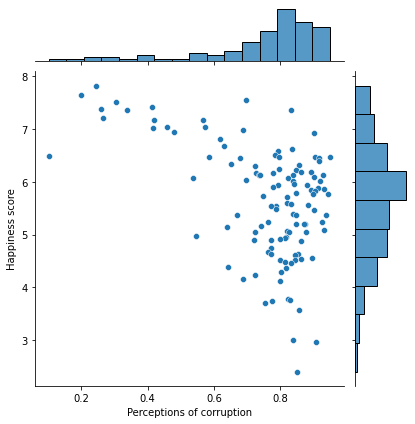

In [130]:
sns.jointplot(x="Perceptions of corruption",y='Happiness score',data=df_merged)

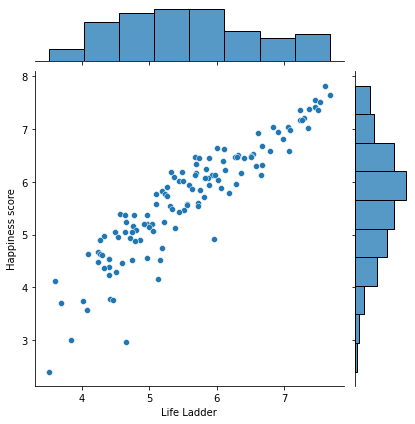

In [105]:
sns.jointplot(x="Life Ladder",y='Happiness score',data=df_merged)

<AxesSubplot:xlabel='Explained by: GDP per capita', ylabel='Happiness score'>

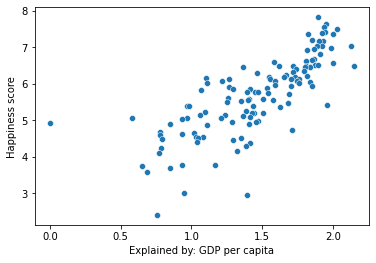

In [106]:
sns.scatterplot(x="Explained by: GDP per capita",y='Happiness score',data=df_merged)

<AxesSubplot:>

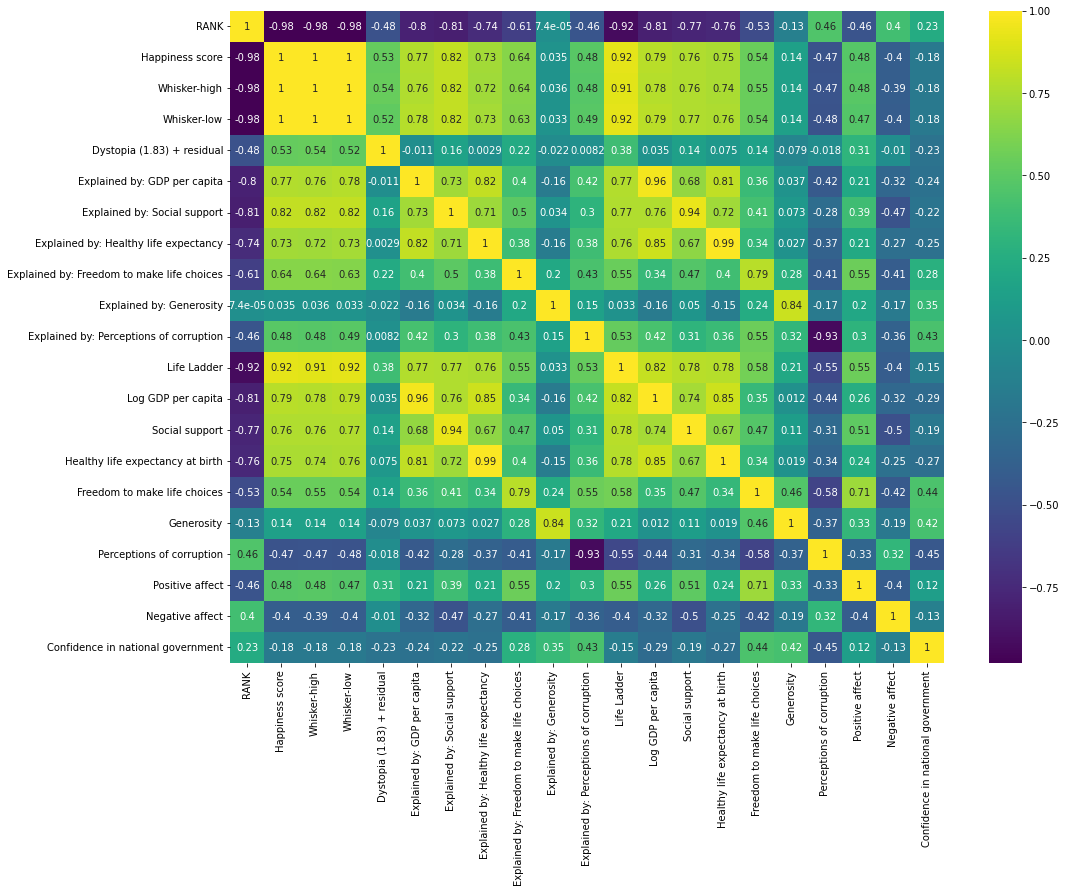

In [107]:
plt.figure(figsize = (16,12))
sns.heatmap(df_merged.corr(),annot=True,cmap="viridis")

**Preprocessing: Missing | Catergorical | Unnecessary**

In [108]:
df_merged.isnull() .sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Life Ladder                                   0
Log GDP per capita                            0
Social support                                0
Healthy life expectancy at birth              2
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     1
Positive affect                               0
Negative affect                         

In [109]:
### We can do a better job and try to fillna values, but for the sake of time, we remove them and go ahead.

df_merged = df_merged.dropna()

In [110]:
df_merged.isnull().sum()

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Life Ladder                                   0
Log GDP per capita                            0
Social support                                0
Healthy life expectancy at birth              0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Positive affect                               0
Negative affect                         

In [111]:
df_merged = df_merged.drop(["RANK","Country"],axis = 1)

In [112]:
df_merged = df_merged.drop(["Whisker-high","Whisker-low"],axis = 1)

**Train Test Split**

In [113]:
X = df_merged.drop("Happiness score",axis =1).values
y = df_merged["Happiness score"].values

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Normalization**

In [114]:
Scaler = MinMaxScaler()

X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

**Model**

**Multi-layer Perceptron regressor**

In [115]:
mlp = MLPRegressor(hidden_layer_sizes=(100,), alpha=0.0001,
    learning_rate='constant',
    learning_rate_init=0.001, 
    max_iter=500)

In [118]:
regres = GridSearchCV(mlp, param_grid={"hidden_layer_sizes": [(25,), (50,)],
                                      "alpha": np.logspace(-4, 4, 9),
                                      "learning_rate_init": [0.1, 0.01, 0.001, 0.0001]})


regres.fit(X_train, y_train)

/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/m

/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/m

/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/m

/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/m

/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/m

/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/m

GridSearchCV(estimator=MLPRegressor(max_iter=500),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'hidden_layer_sizes': [(25,), (50,)],
                         'learning_rate_init': [0.1, 0.01, 0.001, 0.0001]})

In [119]:
regres.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}

In [120]:
MLPpredict = regres.predict(X_test)

In [121]:
y_test

array([6.071, 7.415, 5.891, 6.12 , 7.162, 4.973, 5.371, 4.64 , 6.178,
       7.041, 6.125, 6.467, 4.623, 4.362, 6.687, 7.821, 5.6  , 3.702,
       5.199, 4.479, 5.459, 4.891, 2.955, 7.034, 6.943, 5.399, 6.309,
       6.476, 5.828, 6.48 , 3.75 , 5.547, 5.084, 6.341, 5.24 , 6.022,
       7.163, 6.234, 3.76 ])

In [122]:
mean_squared_error(y_test,MLPpredict)

0.011209175056438207

**TensorFlow**

In [123]:
X.shape

(117, 17)

In [124]:
#TF

model = Sequential()
model.add(Dense(17,activation="relu"))
#model.add(Dropour(0.1))
model.add(Dense(1))
model.compile(loss="mse",optimizer = "adam")

In [126]:
model.fit(
    x = X_train, y = y_train,
    epochs = 250, batch_size = 64,
    validation_data = (X_test,y_test)
)

Epoch 1/250
2/2 [==============================] - 0s 40ms/step - loss: 0.2324 - val_loss: 0.2877
Epoch 2/250
2/2 [==============================] - 0s 27ms/step - loss: 0.2316 - val_loss: 0.2872
Epoch 3/250
2/2 [==============================] - 0s 31ms/step - loss: 0.2308 - val_loss: 0.2868
Epoch 4/250
2/2 [==============================] - 0s 27ms/step - loss: 0.2301 - val_loss: 0.2865
Epoch 5/250
2/2 [==============================] - 0s 29ms/step - loss: 0.2295 - val_loss: 0.2862
Epoch 6/250
2/2 [==============================] - 0s 26ms/step - loss: 0.2290 - val_loss: 0.2859
Epoch 7/250
2/2 [==============================] - 0s 30ms/step - loss: 0.2285 - val_loss: 0.2857
Epoch 8/250
2/2 [==============================] - 0s 27ms/step - loss: 0.2280 - val_loss: 0.2855
Epoch 9/250
2/2 [==============================] - 0s 26ms/step - loss: 0.2275 - val_loss: 0.2853
Epoch 10/250
2/2 [==============================] - 0s 31ms/step - loss: 0.2271 - val_loss: 0.2851
Epoch 11/250
2/2 [=

Epoch 84/250
2/2 [==============================] - 0s 45ms/step - loss: 0.2119 - val_loss: 0.2724
Epoch 85/250
2/2 [==============================] - 0s 25ms/step - loss: 0.2118 - val_loss: 0.2722
Epoch 86/250
2/2 [==============================] - 0s 19ms/step - loss: 0.2116 - val_loss: 0.2721
Epoch 87/250
2/2 [==============================] - 0s 22ms/step - loss: 0.2114 - val_loss: 0.2719
Epoch 88/250
2/2 [==============================] - 0s 19ms/step - loss: 0.2112 - val_loss: 0.2717
Epoch 89/250
2/2 [==============================] - 0s 26ms/step - loss: 0.2110 - val_loss: 0.2715
Epoch 90/250
2/2 [==============================] - 0s 22ms/step - loss: 0.2108 - val_loss: 0.2713
Epoch 91/250
2/2 [==============================] - 0s 22ms/step - loss: 0.2106 - val_loss: 0.2712
Epoch 92/250
2/2 [==============================] - 0s 18ms/step - loss: 0.2104 - val_loss: 0.2710
Epoch 93/250
2/2 [==============================] - 0s 21ms/step - loss: 0.2101 - val_loss: 0.2708
Epoch 94/2

2/2 [==============================] - 0s 21ms/step - loss: 0.1951 - val_loss: 0.2575
Epoch 167/250
2/2 [==============================] - 0s 20ms/step - loss: 0.1949 - val_loss: 0.2574
Epoch 168/250
2/2 [==============================] - 0s 22ms/step - loss: 0.1947 - val_loss: 0.2572
Epoch 169/250
2/2 [==============================] - 0s 44ms/step - loss: 0.1945 - val_loss: 0.2571
Epoch 170/250
2/2 [==============================] - 0s 23ms/step - loss: 0.1943 - val_loss: 0.2569
Epoch 171/250
2/2 [==============================] - 0s 43ms/step - loss: 0.1941 - val_loss: 0.2567
Epoch 172/250
2/2 [==============================] - 0s 21ms/step - loss: 0.1939 - val_loss: 0.2565
Epoch 173/250
2/2 [==============================] - 0s 22ms/step - loss: 0.1937 - val_loss: 0.2563
Epoch 174/250
2/2 [==============================] - 0s 22ms/step - loss: 0.1935 - val_loss: 0.2561
Epoch 175/250
2/2 [==============================] - 0s 20ms/step - loss: 0.1933 - val_loss: 0.2559
Epoch 176/250


2/2 [==============================] - 0s 18ms/step - loss: 0.1791 - val_loss: 0.2433
Epoch 249/250
2/2 [==============================] - 0s 17ms/step - loss: 0.1790 - val_loss: 0.2431
Epoch 250/250
2/2 [==============================] - 0s 20ms/step - loss: 0.1788 - val_loss: 0.2429


In [127]:
predictNN = model.predict(X_test)

In [128]:
mean_squared_error(y_test,predictNN)

0.24290372085863743

In [144]:
from sklearn.decomposition import PCA

In [146]:
pca = PCA(n_components=2)

pca.fit(X)

#Now we can transform this data to its first 2 principal components.
x_pca = pca.transform(X)

In [148]:
x_pca

array([[-6.74830834e+00, -1.43468512e+00],
       [-6.49022742e+00, -1.51371069e+00],
       [-8.20466132e+00, -1.00085505e+00],
       [-8.41114410e+00, -1.10710992e+00],
       [-7.49912729e+00, -1.07829541e+00],
       [-7.82247263e+00, -8.89219075e-01],
       [-7.37119647e+00, -1.16764036e+00],
       [-8.06568273e+00, -6.98167693e-01],
       [-6.31429881e+00, -9.93373104e-01],
       [-6.74942722e+00, -1.00450372e+00],
       [-6.85948609e+00, -9.34741757e-01],
       [-6.94216088e+00, -8.34523115e-01],
       [-6.62606833e+00, -6.65388873e-01],
       [-7.35717141e+00, -8.65196847e-01],
       [-2.94804577e+00, -1.63618665e+00],
       [-5.98444753e+00, -7.44404912e-01],
       [-4.44374791e+00, -7.32962625e-01],
       [-6.05196142e+00, -9.02743482e-01],
       [-7.78980552e+00, -1.48994761e-01],
       [-6.09863900e+00,  1.11175360e-01],
       [-5.75245279e+00, -5.47035659e-01],
       [-5.39866970e+00, -3.38205606e-01],
       [-9.08612130e+00,  1.52910158e-01],
       [-2.

Text(0, 0.5, 'Second Principal Component')

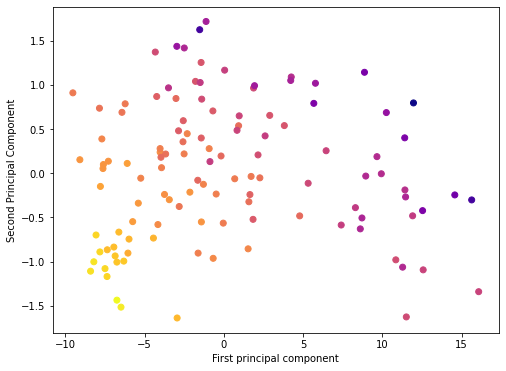

In [150]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [154]:
pca.explained_variance_

array([42.35810364,  0.59423452])

In [156]:
pca.explained_variance_ratio_

array([0.97378912, 0.01366112])